In [2]:
#%% Libraries
import torch

#### Ex. 1: A linear approach

In [10]:
# Ex. 1.1

w = torch.tensor([0.4,0.1], requires_grad=True)
b = torch.tensor(1.0,  requires_grad=True)
x = torch.tensor([0.5,0.4],  requires_grad=True)
print(w.shape)
print(b.shape)
print(x.shape)
y_hat = w.T @ x+b
print(y_hat)


torch.Size([2])
torch.Size([])
torch.Size([2])
tensor(1.2400, grad_fn=<AddBackward0>)


In [11]:
# Ex. 1.2

class Linear(torch.nn.Module):
    def __init__(self):
        super().__init__() 
        w = torch.tensor([0.4,0.1], requires_grad=True)
        b = torch.tensor(1.0,  requires_grad=True)
        self.w = torch.nn.Parameter(w)
        self.b = torch.nn.Parameter(b)

    def forward(self, x):
        w = self.w
        b = self.b
        return w.T @ x+b

# call the module
model = Linear()

# apply the forward function
x = torch.tensor([0.5,0.4])
y_hat = model(x)
print(y_hat) 

tensor(1.2400, grad_fn=<AddBackward0>)


In [12]:
# Ex. 1.3

y = -0.5
def squared_error(y, y_hat):
    return (y-y_hat)**2

loss = squared_error(y, y_hat)
print(loss)



tensor(3.0276, grad_fn=<PowBackward0>)


In [13]:
# Ex. 1.4

# compute the gradients and print them
loss.backward()

# print the gradients
print("Gradient of w: ", model.w.grad)
print("Gradient of b: ", model.b.grad)


Gradient of w:  tensor([1.7400, 1.3920])
Gradient of b:  tensor(3.4800)


In [16]:
# Ex. 1.5 


learning_rate = 0.01

def optimize_weights(model, learning_rate):
    w = model.w
    b = model.b
    w_grad = model.w.grad
    b_grad = model.b.grad

    # update the weights here with learning rate
    w_new = w - learning_rate * w_grad
    b_new = b - learning_rate * b_grad

    # update the model weight
    model.w.data = w_new
    model.b.data = b_new 


# reinitialize the model, etc
model = Linear()
y_hat = model(x)
loss = squared_error(y, y_hat)

# compute the gradients
loss.backward()


optimize_weights(model, learning_rate)
# print the new gradients
print("Gradient of w: ", model.w.data)
print("Gradient of b: ", model.b.data)
y_hat_new = model(x)
loss_new = squared_error(y, y_hat_new)

print(y_hat_new)
print(loss_new)


Gradient of w:  tensor([0.3826, 0.0861])
Gradient of b:  tensor(0.9652)
tensor(1.1909, grad_fn=<AddBackward0>)
tensor(2.8593, grad_fn=<PowBackward0>)


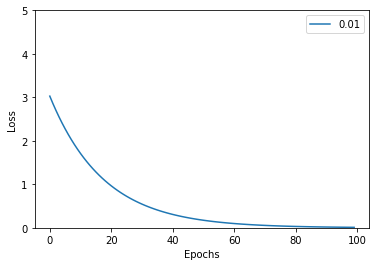

In [18]:
# Ex. 1.6: Training curve
epochs = 100
# initialize model
model = Linear()
learning_rate = 0.01
losses = []
for i in range(epochs): 

    # apply algorithm and obtain loss
    y_hat = model(x)
    loss = squared_error(y, y_hat)
    
    losses.append(loss.detach().item())

    # zero previous gradients before computing gradient
    model.zero_grad()

    # compute gradient
    loss.backward()

    # optimize weights
    optimize_weights(model, learning_rate)
        

from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(losses, label=learning_rate)
ax.legend()
ax.set_ylim(0,5) 
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs")
plt.savefig("ex1.6.jpg")
plt.show()





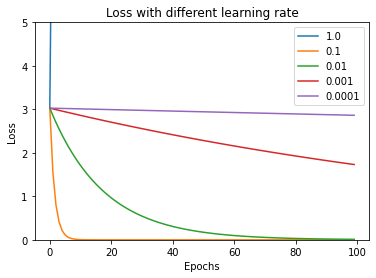

In [19]:
# Ex 1.7: Use different learning rate [1.0, 0.1, 0.01, 0.001, 0.0001] and plot

epochs = 100
y = -0.5
x = torch.tensor([[0.5], [0.4]], requires_grad=False)
learning_rates = [1.0, 0.1, 0.01, 0.001, 0.0001]
losses_for_lr = {}
for learning_rate in learning_rates:

    model = Linear()
    losses_for_lr[learning_rate] = []
    for i in range(epochs): 

        # reinitialize the results
        y_hat = model(x)
        loss = squared_error(y, y_hat)

        # zero previous gradients before computing gradient
        model.zero_grad()

        # compute gradient
        loss.backward()
        
        losses_for_lr[learning_rate].append(loss.detach().item())

        optimize_weights(model, learning_rate)
        


from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)
for learning_rate, losses in losses_for_lr.items():
    ax.plot(losses, label=learning_rate)
ax.legend()
ax.set_ylim(0,5) 
ax.set_title("Loss with different learning rate")
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs")
plt.savefig("ex1.7.jpg", dpi=600)
plt.show()

### Section 2: Gradient descent

In [36]:
# Eg. 2:
y = -0.5
x = torch.tensor([[0.5], [0.4]], requires_grad=True)
model = Linear()
learning_rate = 0.01

def compute_grad_w0(x_0, x_1, y, w_0, w_1, b):
    return 2 * x_0 * (x_0 * w_0 + x_1 * w_1 + b - y)

y_hat = model(x)
loss = squared_error(y, y_hat)
loss.backward()

w_0_grad = compute_grad_w0(x[0], x[1], y, model.w[0], model.w[1], model.b)
print(w_0_grad)
print(model.w.grad[0])

assert torch.allclose(w_0_grad, model.w.grad[0])



tensor([1.7400], grad_fn=<MulBackward0>)
tensor(1.7400)
tensor([3.0276], grad_fn=<PowBackward0>)


In [37]:
# Ex. 2:
y = -0.5
x = torch.tensor([[0.5], [0.4]], requires_grad=True)
model = Linear()
learning_rate = 0.01


def compute_grad_w1(x_0, x_1, y, w_0, w_1, b):
    return 2 * x_1 * (x_1 * w_1 + x_0 * w_0 + b - y)

y_hat = model(x)
loss = squared_error(y, y_hat)
loss.backward()

w_1_grad = compute_grad_w1(x[0], x[1], y, model.w[0], model.w[1], model.b)
print(w_1_grad)
print(model.w.grad[1])

assert torch.allclose(w_1_grad, model.w.grad[1])


tensor([1.3920], grad_fn=<MulBackward0>)
tensor(1.3920)
tensor([3.0276], grad_fn=<PowBackward0>)


In [ ]:
#error = y - y_hat
#loss = error**2